In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn import tree
# pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

cs_df = pd.read_csv("C:/Users/Marvin/CS513/csgo_round_snapshots.csv")
cs_df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


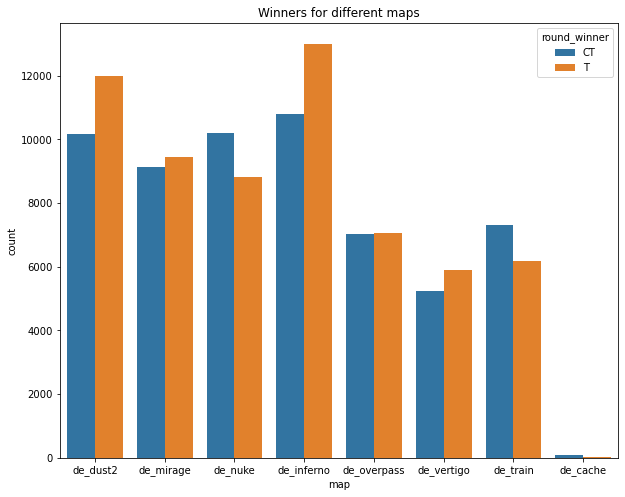

In [2]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="map", hue="round_winner", data=cs_df)
ax.set(title='Winners for different maps')
plt.show()

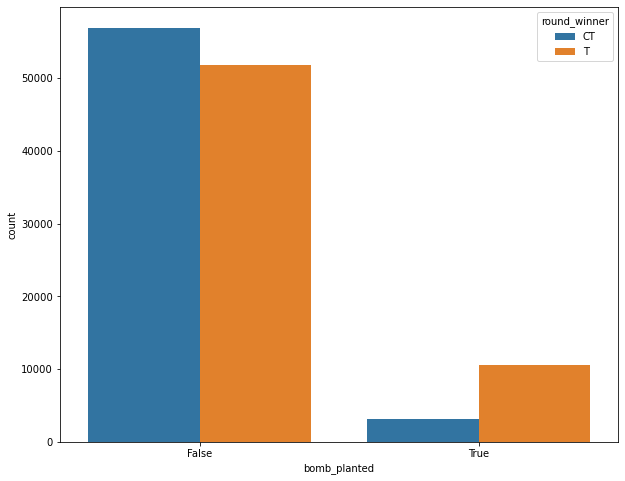

In [3]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="bomb_planted", hue="round_winner", data=cs_df)
plt.show()

In [4]:
enc = LabelEncoder()
scaler = StandardScaler()

cs_df['bomb_planted'] = cs_df['bomb_planted'].astype('float64')
cs_df['round_winner'] = cs_df['round_winner'].replace({'T' : 0, 'CT' : 1})
cs_df['map'] = enc.fit(cs_df['map'])
cs_df['map'] = cs_df.bomb_planted.astype('float64')

<AxesSubplot:>

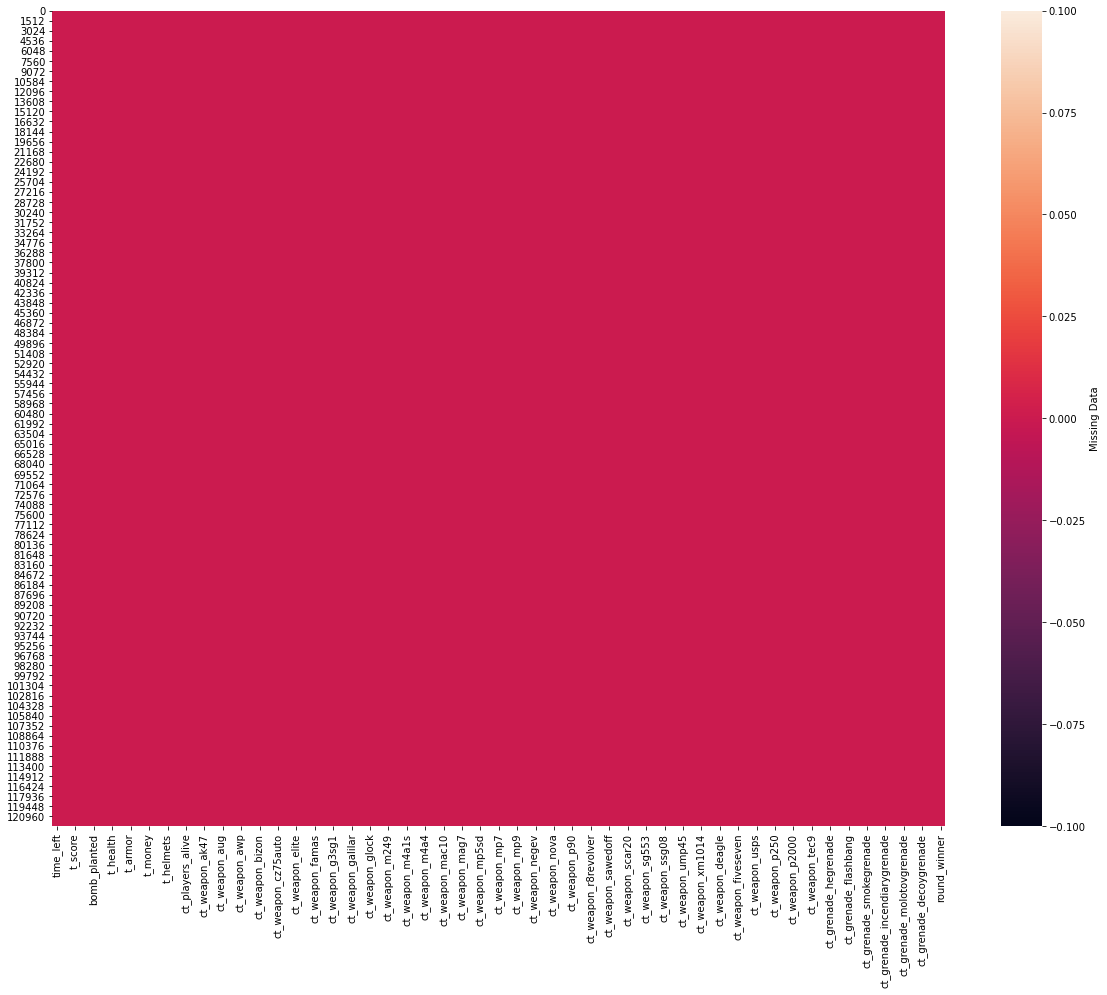

In [5]:
# Missing Data

plt.figure(figsize = (20, 15))
sns.heatmap(cs_df.isna(), cbar_kws={'label': 'Missing Data'})

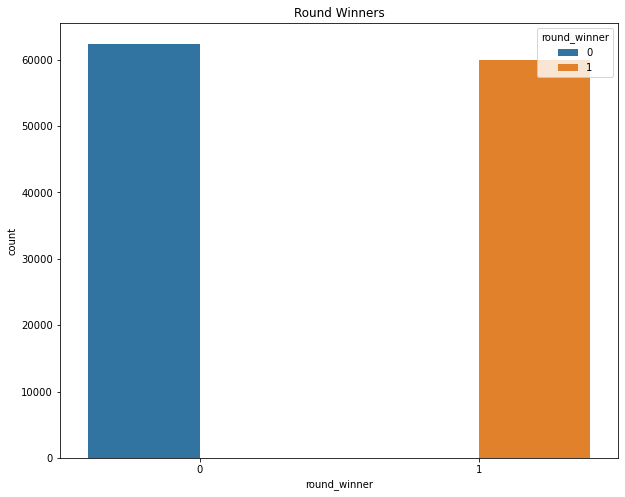

In [6]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="round_winner", hue="round_winner", data=cs_df)
ax.set(title='Round Winners')
plt.show()

In [7]:
print(cs_df.dtypes, cs_df.isnull().sum())

time_left                    float64
ct_score                     float64
t_score                      float64
map                          float64
bomb_planted                 float64
                              ...   
ct_grenade_molotovgrenade    float64
t_grenade_molotovgrenade     float64
ct_grenade_decoygrenade      float64
t_grenade_decoygrenade       float64
round_winner                   int64
Length: 97, dtype: object time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64


In [8]:
# Splitting to train test

y = cs_df['round_winner']
cs_df = cs_df.drop('round_winner', axis = 1)
X = pd.DataFrame(scaler.fit_transform(cs_df), columns = cs_df.columns)
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 0, shuffle=True)

In [9]:
train_Xall = train_X
test_Xall = test_X
train_yall = train_y
test_yall = test_y

In [10]:
#################################
# 1) Dropping constant features using variance threshold 
# Variance threshold will remove all the 0 variance features
#################################

vat_th = VarianceThreshold(threshold=0.01)
vat_th.fit(train_X)
vat_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [11]:
zvar_col = [col for col in train_X.columns if col not in train_X.columns[vat_th.get_support()]]
print(len(zvar_col))

for fet in zvar_col:
    print(fet)

7
ct_weapon_bizon
ct_weapon_g3sg1
ct_weapon_m249
t_weapon_m249
ct_weapon_negev
ct_weapon_r8revolver
ct_weapon_sawedoff


In [12]:
train_X = train_X.drop(zvar_col, axis=1)
test_X = test_X.drop(zvar_col, axis=1)
train_X

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
4481,-0.421866,0.478204,-0.576432,-0.354764,-0.354764,0.664386,0.695301,1.039928,1.068621,-0.484978,...,0.082832,1.750884,0.264235,1.843956,-0.001350,-0.137694,-0.210881,0.990780,-0.163356,-0.156855
78244,1.414175,-0.565563,-0.161798,-0.354764,-0.354764,0.664386,0.695301,-0.106076,-1.709542,0.727684,...,-0.481253,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
61042,-0.938711,0.686957,-0.783750,-0.354764,-0.354764,-0.786941,-2.327888,0.396762,-0.821675,-0.480519,...,0.082832,-0.478192,-0.311206,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
50891,-0.145542,-0.356809,-0.161798,-0.354764,-0.354764,-0.091513,0.695301,0.502008,1.154543,0.228353,...,1.211001,0.636346,-0.886648,1.297251,-0.001350,-0.137694,-0.210881,0.990780,-0.163356,-0.156855
106412,-1.522572,-0.983069,1.082106,-0.354764,-0.354764,-2.963931,-1.077160,-1.269621,0.490075,-0.868393,...,-1.045338,-0.478192,-0.886648,-0.342864,-0.687185,-0.137694,-0.210881,0.389544,-0.163356,-0.156855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,1.414542,0.478204,1.704058,-0.354764,-0.354764,0.664386,0.695301,-1.252080,-1.136725,1.307265,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
117952,-0.420764,0.478204,0.667472,-0.354764,-0.354764,0.664386,0.695301,-1.836777,1.057164,0.353186,...,-1.045338,1.750884,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,1.592017,-0.163356,-0.156855
42613,-1.357512,-0.774316,-1.405702,2.818773,2.818773,-0.847413,-0.019401,-0.082688,0.581726,-0.239770,...,0.082832,-1.035461,-0.886648,-0.889569,-0.687185,6.810000,-0.210881,-0.812929,-0.163356,-0.156855
43567,1.289692,0.269451,-0.576432,-0.354764,-0.354764,0.664386,0.695301,1.004846,1.154543,1.030850,...,1.775085,1.750884,1.415117,1.843956,2.741988,-0.137694,-0.210881,1.592017,-0.163356,-0.156855


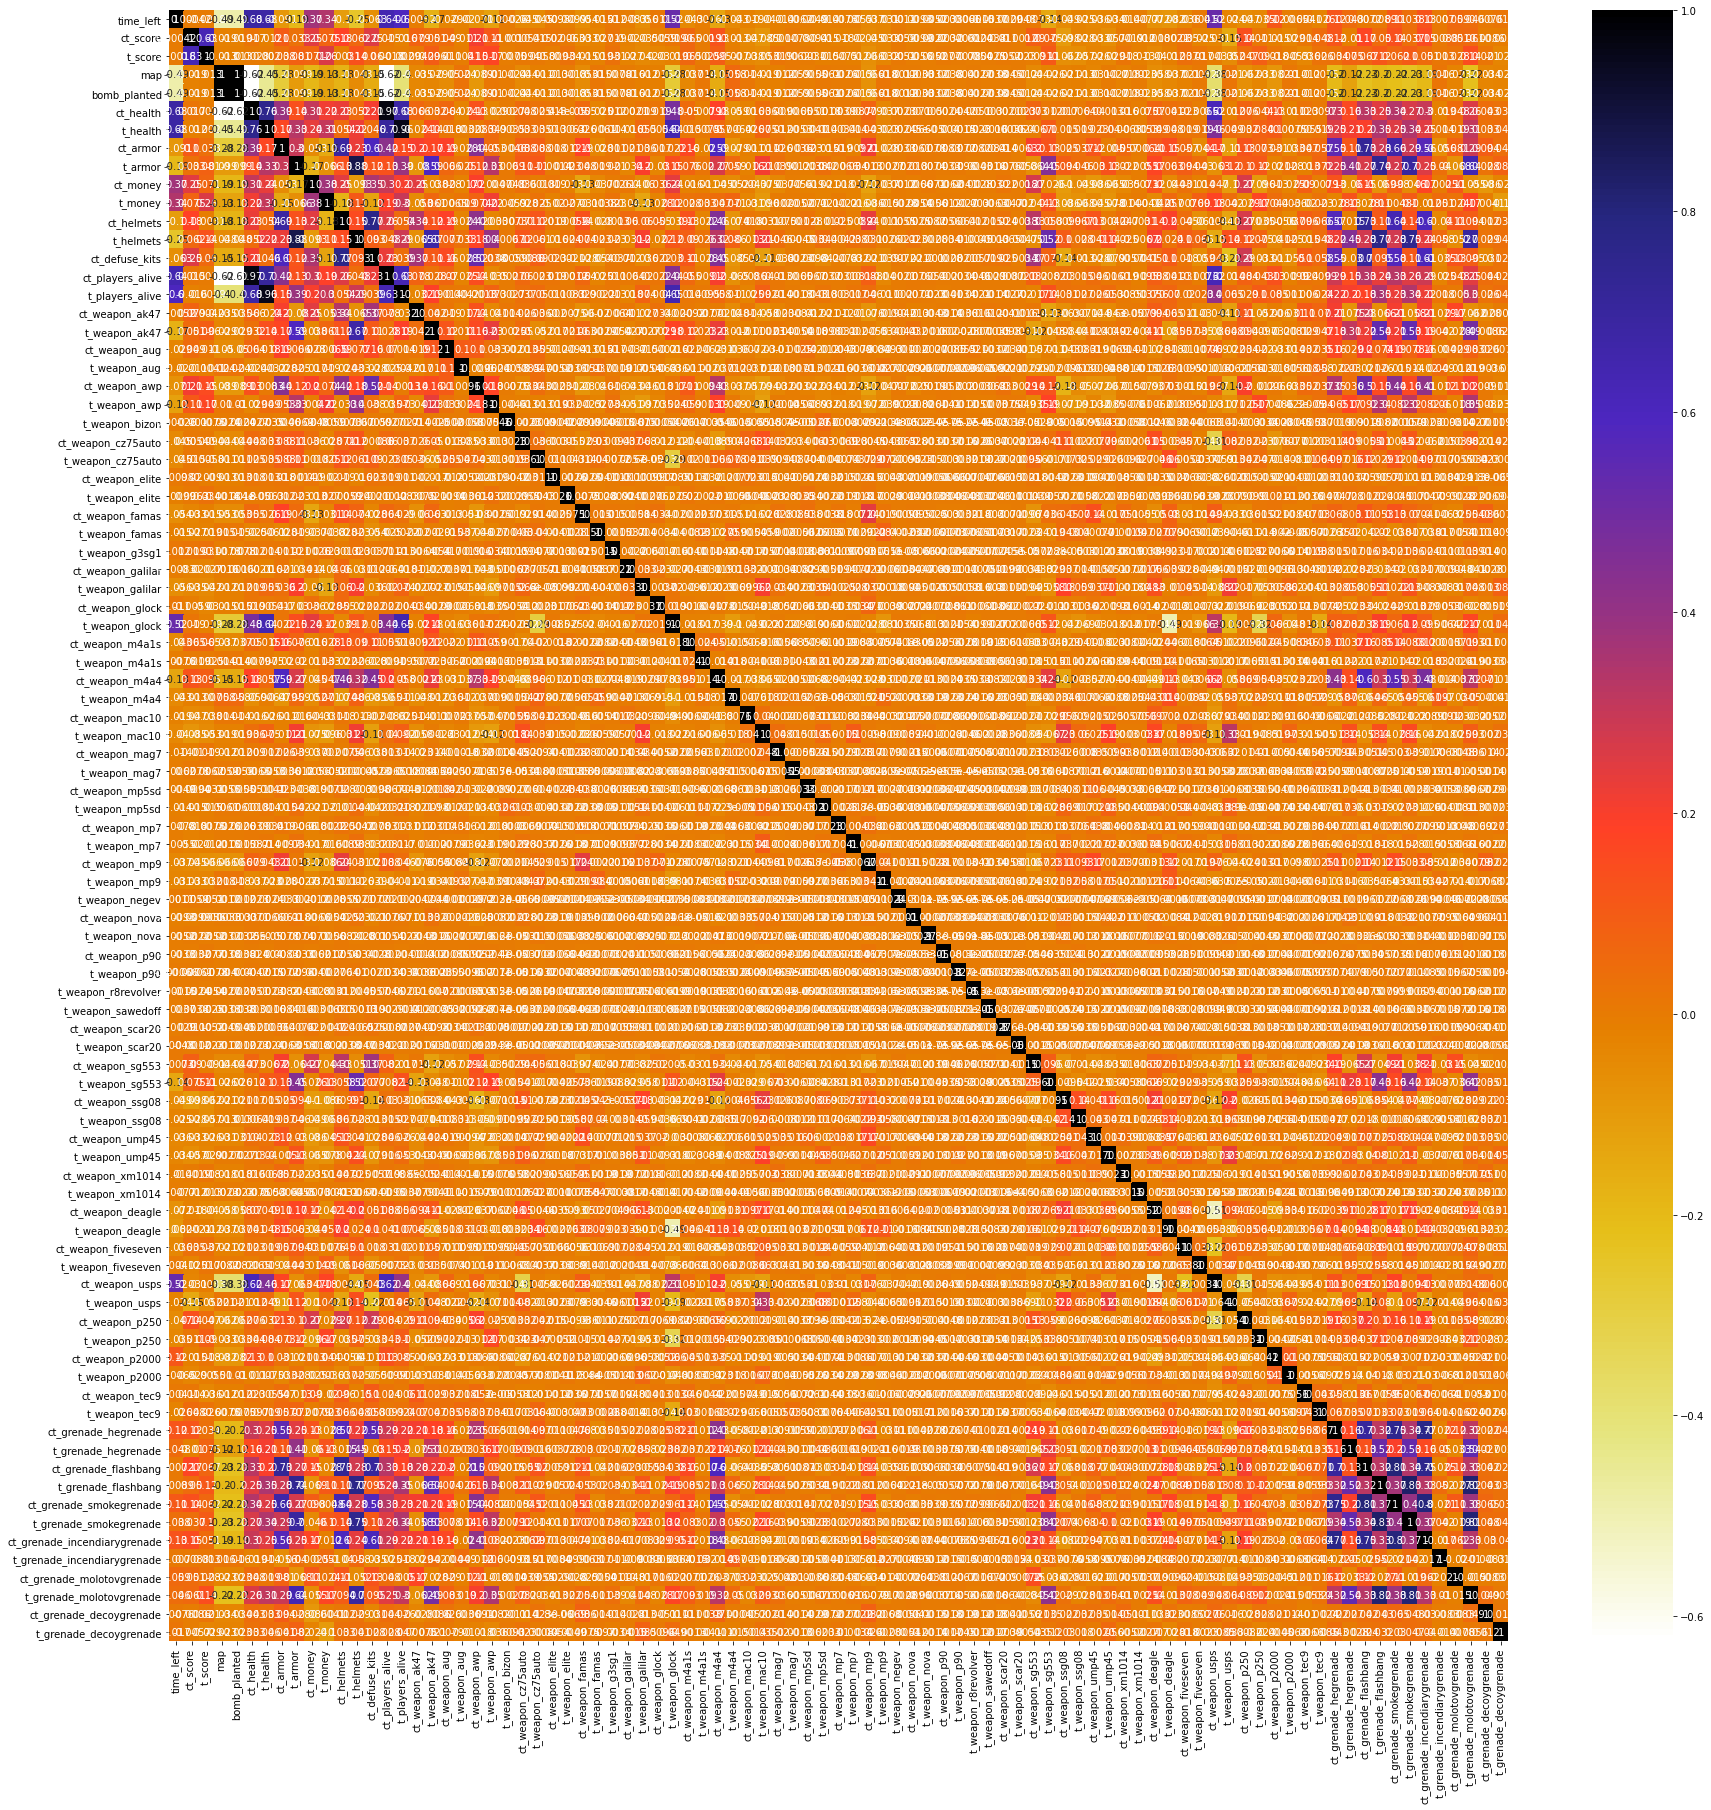

In [13]:
#################################
# 2) CORRELATION 
#################################

plt.figure(figsize = (30, 30))
correlation_X = train_X.corr()
sns.heatmap(correlation_X, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:
col_corr_fet = set()  
corr_matrix = train_X.corr()

for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.8: 
                col_corr_fet.add(corr_matrix.columns[i])
                
print(len(col_corr_fet), col_corr_fet)

8 {'t_grenade_smokegrenade', 'ct_grenade_smokegrenade', 'bomb_planted', 't_helmets', 't_players_alive', 't_grenade_molotovgrenade', 'ct_grenade_incendiarygrenade', 'ct_players_alive'}


In [15]:
train_X = train_X.drop(col_corr_fet, axis=1)
test_X = test_X.drop(col_corr_fet, axis=1)
train_X

,time_left,ct_score,t_score,map,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
4481,-0.421866,0.478204,-0.576432,-0.354764,0.664386,0.695301,1.039928,1.068621,-0.484978,-0.311692,...,-0.085586,-0.147871,0.078731,0.695102,0.082832,1.750884,-0.137694,-0.210881,-0.163356,-0.156855
78244,1.414175,-0.565563,-0.161798,-0.354764,0.664386,0.695301,-0.106076,-1.709542,0.727684,4.304860,...,-0.085586,-0.147871,-0.701566,-0.542299,-0.481253,-1.035461,-0.137694,-0.210881,-0.163356,-0.156855
61042,-0.938711,0.686957,-0.783750,-0.354764,-0.786941,-2.327888,0.396762,-0.821675,-0.480519,-0.677563,...,-0.085586,-0.147871,-0.701566,0.695102,0.082832,-0.478192,-0.137694,-0.210881,-0.163356,-0.156855
50891,-0.145542,-0.356809,-0.161798,-0.354764,-0.091513,0.695301,0.502008,1.154543,0.228353,0.510490,...,-0.085586,-0.147871,1.639325,0.695102,1.211001,0.636346,-0.137694,-0.210881,-0.163356,-0.156855
106412,-1.522572,-0.983069,1.082106,-0.354764,-2.963931,-1.077160,-1.269621,0.490075,-0.868393,-0.081481,...,-0.085586,-0.147871,-0.701566,-0.542299,-1.045338,-0.478192,-0.137694,-0.210881,-0.163356,-0.156855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,1.414542,0.478204,1.704058,-0.354764,0.664386,0.695301,-1.252080,-1.136725,1.307265,0.185728,...,-0.085586,-0.147871,-0.701566,-0.542299,-1.045338,-1.035461,-0.137694,-0.210881,-0.163356,-0.156855
117952,-0.420764,0.478204,0.667472,-0.354764,0.664386,0.695301,-1.836777,1.057164,0.353186,-0.652898,...,-0.085586,-0.147871,-0.701566,1.932503,-1.045338,1.750884,-0.137694,-0.210881,-0.163356,-0.156855
42613,-1.357512,-0.774316,-1.405702,2.818773,-0.847413,-0.019401,-0.082688,0.581726,-0.239770,-0.328136,...,-0.085586,-0.147871,-0.701566,-0.542299,0.082832,-1.035461,6.810000,-0.210881,-0.163356,-0.156855
43567,1.289692,0.269451,-0.576432,-0.354764,0.664386,0.695301,1.004846,1.154543,1.030850,-0.706340,...,-0.085586,-0.147871,2.419621,-0.542299,1.775085,1.750884,-0.137694,-0.210881,-0.163356,-0.156855


In [16]:
################################# 
# 3) mutual information
#################################

from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(train_X, train_y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_X.columns
mutual_info = mutual_info.sort_values(ascending=False)

In [17]:
mutual_info

t_armor                 0.084094
ct_armor                0.068983
ct_defuse_kits          0.050984
ct_helmets              0.049117
ct_grenade_flashbang    0.039810
                          ...   
t_weapon_r8revolver     0.000000
t_weapon_p90            0.000000
ct_weapon_p90           0.000000
ct_weapon_nova          0.000000
ct_weapon_mac10         0.000000
Length: 81, dtype: float64

<AxesSubplot:>

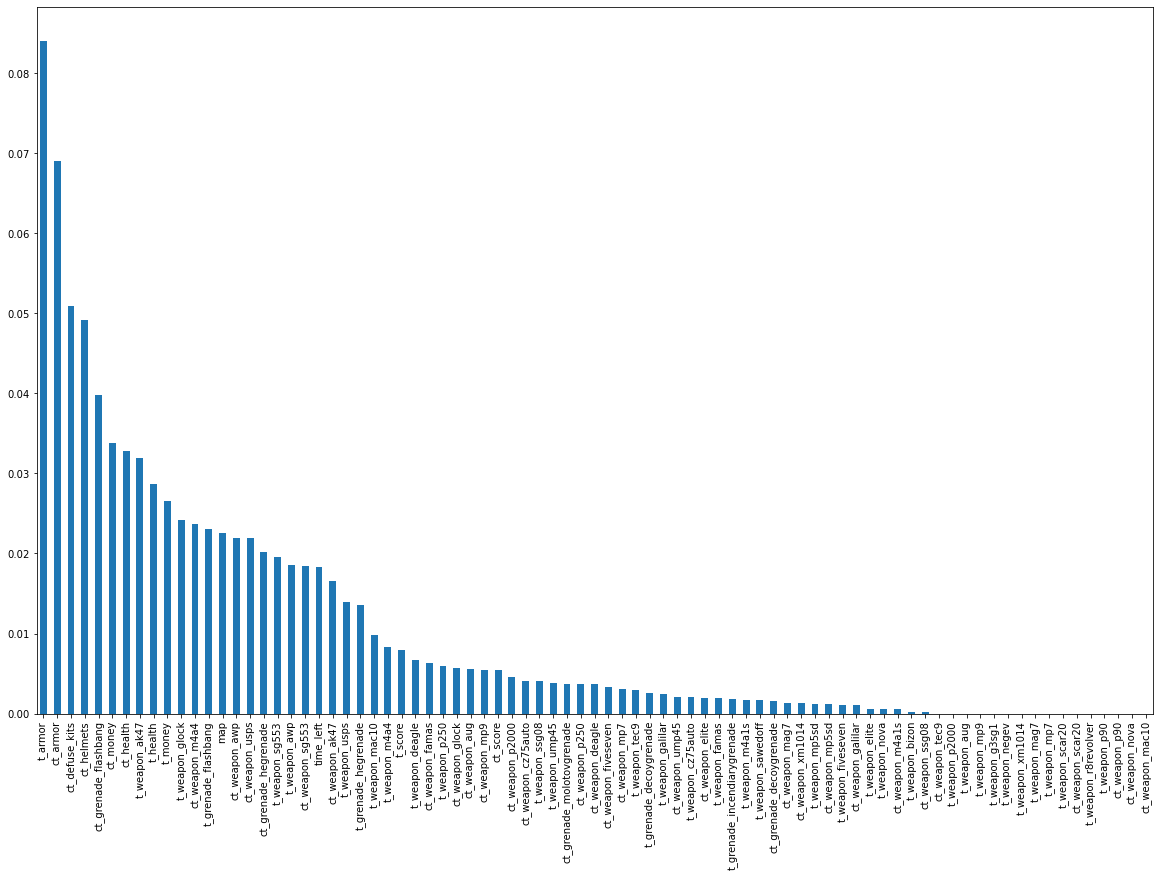

In [18]:
mutual_info.plot.bar(figsize=(20, 13))

In [19]:
features = list(pd.DataFrame(mutual_info).index[45:82].values)
train_X = train_X.drop(features, axis=1)
test_X = test_X.drop(features, axis=1)

In [20]:
# Selecting top 30 features

set_cols = SelectKBest(mutual_info_classif, k=30)
set_cols.fit(train_X, train_y)
train_X.columns[set_cols.get_support()]

Index(['time_left', 'map', 'ct_health', 't_health', 'ct_armor', 't_armor',
       'ct_money', 't_money', 'ct_helmets', 'ct_defuse_kits', 'ct_weapon_ak47',
       't_weapon_ak47', 'ct_weapon_aug', 'ct_weapon_awp', 't_weapon_awp',
       't_weapon_glock', 'ct_weapon_m4a4', 't_weapon_m4a4', 't_weapon_mac10',
       'ct_weapon_mp9', 'ct_weapon_sg553', 't_weapon_sg553', 't_weapon_ump45',
       't_weapon_deagle', 'ct_weapon_usps', 't_weapon_usps',
       'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang',
       't_grenade_flashbang'],
      dtype='object')

In [21]:
top_lst = train_X.columns[set_cols.get_support()]

val1 = train_X.loc[:, top_lst].values
train_X = pd.DataFrame(val1, columns = top_lst)

val2 = test_X.loc[:, top_lst].values
test_X = pd.DataFrame(val2, columns = top_lst)

train_X

,time_left,map,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,ct_defuse_kits,...,ct_weapon_sg553,t_weapon_sg553,t_weapon_ump45,t_weapon_deagle,ct_weapon_usps,t_weapon_usps,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang
0,-0.421866,-0.354764,0.664386,0.695301,1.039928,1.068621,-0.484978,-0.311692,-0.572317,0.240554,...,-0.431618,1.031170,-0.172652,-0.467479,0.516902,-0.278862,0.078731,0.695102,0.082832,1.750884
1,1.414175,-0.354764,0.664386,0.695301,-0.106076,-1.709542,0.727684,4.304860,-0.029271,-0.382199,...,-0.431618,-0.723924,-0.172652,-0.467479,-0.743511,-0.278862,-0.701566,-0.542299,-0.481253,-1.035461
2,-0.938711,-0.354764,-0.786941,-2.327888,0.396762,-0.821675,-0.480519,-0.677563,-0.029271,0.863307,...,-0.431618,0.153623,-0.172652,-0.467479,0.516902,-0.278862,-0.701566,0.695102,0.082832,-0.478192
3,-0.145542,-0.354764,-0.091513,0.695301,0.502008,1.154543,0.228353,0.510490,0.513776,0.240554,...,-0.431618,0.153623,-0.172652,-0.467479,-0.113304,-0.278862,1.639325,0.695102,1.211001,0.636346
4,-1.522572,-0.354764,-2.963931,-1.077160,-1.269621,0.490075,-0.868393,-0.081481,-0.572317,-1.004951,...,-0.431618,1.908717,-0.172652,1.987333,-1.373717,-0.278862,-0.701566,-0.542299,-1.045338,-0.478192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85682,1.414542,-0.354764,0.664386,0.695301,-1.252080,-1.136725,1.307265,0.185728,-0.572317,-0.382199,...,-0.431618,-0.723924,-0.172652,-0.467479,1.147109,-0.278862,-0.701566,-0.542299,-1.045338,-1.035461
85683,-0.420764,-0.354764,0.664386,0.695301,-1.836777,1.057164,0.353186,-0.652898,-1.115364,-1.004951,...,-0.431618,-0.723924,-0.172652,0.759927,-0.113304,-0.278862,-0.701566,1.932503,-1.045338,1.750884
85684,-1.357512,2.818773,-0.847413,-0.019401,-0.082688,0.581726,-0.239770,-0.328136,-0.029271,-0.382199,...,-0.431618,0.153623,-0.172652,4.442145,-0.113304,-0.278862,-0.701566,-0.542299,0.082832,-1.035461
85685,1.289692,-0.354764,0.664386,0.695301,1.004846,1.154543,1.030850,-0.706340,1.599869,1.486060,...,-0.431618,-0.723924,-0.172652,-0.467479,-0.743511,-0.278862,2.419621,-0.542299,1.775085,1.750884


In [22]:
test_X

,time_left,map,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,ct_defuse_kits,...,ct_weapon_sg553,t_weapon_sg553,t_weapon_ump45,t_weapon_deagle,ct_weapon_usps,t_weapon_usps,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang
0,0.313469,-0.354764,0.664386,0.695301,1.086704,0.976970,-0.823810,0.650261,-0.572317,-1.004951,...,-0.431618,-0.723924,-0.172652,0.759927,0.516902,-0.278862,0.859028,3.169904,0.646916,1.750884
1,-1.155364,-0.354764,-2.699366,-2.356476,-1.363173,-1.159637,-0.846101,-0.772114,-1.115364,-1.004951,...,-0.431618,-0.723924,-0.172652,-0.467479,-1.373717,-0.278862,-0.701566,-0.542299,-1.045338,-0.478192
2,0.312734,-0.354764,0.664386,0.695301,1.086704,0.719202,-0.698977,-0.319914,1.056823,0.240554,...,-0.431618,1.908717,-0.172652,-0.467479,0.516902,-0.278862,2.419621,-0.542299,0.646916,1.750884
3,-0.421131,-0.354764,0.641709,0.416568,0.969764,1.080077,-0.137229,-0.846111,1.056823,1.486060,...,-0.431618,0.153623,-0.172652,-0.467479,1.147109,-0.278862,0.078731,-0.542299,0.646916,0.636346
4,-0.421866,-0.354764,0.664386,-0.019401,1.086704,-1.709542,-0.756935,-0.270583,1.599869,0.240554,...,-0.431618,-0.723924,-0.172652,-0.467479,1.147109,-0.278862,-0.701566,-0.542299,1.211001,-1.035461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36718,0.313285,-0.354764,0.664386,0.695301,0.940530,1.125902,-0.779227,-0.023929,0.513776,-0.382199,...,-0.431618,-0.723924,-0.172652,-0.467479,-0.113304,-0.278862,0.078731,3.169904,1.211001,1.750884
36719,1.414910,-0.354764,0.664386,0.695301,-0.766783,-1.709542,1.663931,0.119953,-0.029271,0.240554,...,-0.431618,-0.723924,-0.172652,-0.467479,0.516902,-0.278862,-0.701566,-0.542299,-0.481253,-1.035461
36720,-0.513484,-0.354764,0.052107,0.488038,1.016540,0.008909,0.366561,0.087066,1.599869,2.108812,...,1.373205,-0.723924,-0.172652,3.214739,0.516902,-0.278862,2.419621,-0.542299,0.646916,-1.035461
36721,-1.156282,-0.354764,-1.882995,-0.019401,-1.252080,0.341143,-0.413645,-0.278805,-1.115364,-1.004951,...,-0.431618,1.031170,-0.172652,-0.467479,-2.003924,-0.278862,-0.701566,1.932503,-1.045338,0.079077


In [23]:
##Technique-1(Logistic Regression Reduced)
mdl_lr = LogisticRegression(random_state=0).fit(train_X, train_y)
pred_y_lr = mdl_lr.predict(test_X)

##Finding the accuracy 
train_error = mdl_lr.score(train_X,train_y)
print(train_error)
mdl_lr.score(test_X, test_y)

0.7467877274265641


0.7464804073741252

In [24]:
mdl_lr = LogisticRegression(random_state=0).fit(train_Xall, train_yall)
pred_y_lr = mdl_lr.predict(test_Xall)

##Finding the accuracy 
train_error = mdl_lr.score(train_Xall,train_yall)
print(train_error)
mdl_lr.score(test_Xall, test_yall)

0.7486083069777213


0.7478964136916919

In [27]:
# Technique-2(Naive Bayes Reduced)

mdl_nb = GaussianNB()
mdl_nb.fit(train_X, train_y)

pred_y_nb = mdl_nb.predict(test_X)
train_error = mdl_nb.score(train_X,train_y)
print(train_error)
mdl_nb.score(test_X, test_y)

0.7096175615904396


0.7120877923916892

In [28]:
# Technique-2(Naive Bayes)

mdl_nb = GaussianNB()
mdl_nb.fit(train_Xall, train_yall)

pred_y_nb = mdl_nb.predict(test_Xall)
train_error = mdl_nb.score(train_Xall,train_yall)
print(train_error)
mdl_nb.score(test_Xall, test_yall)

0.5229147945429296


0.5238134139367698

In [29]:
# Technique-3(Decision Tree Reduced)

mdl_dtree = tree.DecisionTreeClassifier(max_depth = 20)
mdl_dtree.fit(train_X,train_y)

pred_y_dtree = mdl_dtree.predict(test_X)
train_error = mdl_dtree.score(train_X,train_y)
print(train_error)
mdl_dtree.score(test_X, test_y)

0.9136741862826333


0.7795931704926068

In [31]:
# Technique-3(Decision Tree)

mdl_dtree = tree.DecisionTreeClassifier(max_depth = 20)
mdl_dtree.fit(train_Xall,train_yall)

pred_y_dtree = mdl_dtree.predict(test_Xall)
train_error = mdl_dtree.score(train_Xall,train_yall)
print(train_error)
mdl_dtree.score(test_Xall, test_yall)

0.9165451001902272


0.7885793644310105

In [32]:
##Technique-4(XGB Reduced)

mdl_xbg = XGBClassifier()
mdl_xbg.fit(train_X, train_y)
pred_y_xgb = mdl_xbg.predict(test_X)
train_error = mdl_xbg.score(train_X,train_y)
print(train_error)
mdl_xbg.score(test_X, test_y)

C:\Users\Marvin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8350975060394226


0.7897230618413529

In [33]:
# Creating a dictionary of the parameters to be tuned for RandomSearch
params={
 "learning_rate"    : [0.025,0.05, 0.10, 0.15, 0.20, 0.25] ,
 "max_depth"        : [ 2 ,3, 4, 5, 6, 8, 10, 12],
 "n_estimators"     : [100,200,400,500,600,800],
 "min_child_weight" : [ 1, 2,3, 5 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [34]:
##Implementing RandomSearch
random_search=RandomizedSearchCV(XGBClassifier(),param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(train_X,train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Marvin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:57:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [35]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=800, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
random_search.best_params_

{'n_estimators': 800,
 'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.15,
 'colsample_bytree': 0.4}

In [37]:
mdl_xgb_rs = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.025, max_delta_step=0, max_depth=12,
              min_child_weight=2, monotone_constraints='()',
              n_estimators=800, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

mdl_xgb_rs.fit(train_X, train_y)

[15:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.025, max_delta_step=0, max_depth=12,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=800, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [38]:
pred_xgb_rs = mdl_xgb_rs.predict(test_X)
train_error = mdl_xgb_rs.score(train_X,train_y)
print(train_error)
mdl_xgb_rs.score(test_X, test_y)

0.9456627026270029


0.8327206382920785

In [39]:
# Technique-4(XGB)

mdl_xbg = XGBClassifier()
mdl_xbg.fit(train_Xall, train_yall)
pred_y_xgb = mdl_xbg.predict(test_Xall)
train_error = mdl_xbg.score(train_Xall,train_yall)
print(train_error)
mdl_xbg.score(test_Xall, test_yall)

C:\Users\Marvin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:59:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8374899342957508


0.7962584756147374

In [40]:
# Creating a dictionary of the parameters to be tuned for RandomSearch
params={
 "learning_rate"    : [0.025,0.05, 0.10, 0.15, 0.20, 0.25] ,
 "max_depth"        : [ 2 ,3, 4, 5, 6, 8, 10, 12],
 "n_estimators"     : [100,200,400,500,600,800],
 "min_child_weight" : [ 1, 2,3, 5 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [41]:
##Implementing RandomSearch
random_search=RandomizedSearchCV(XGBClassifier(),param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(train_Xall,train_yall)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Marvin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:07:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [42]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [43]:
random_search.best_params_

{'n_estimators': 500,
 'min_child_weight': 5,
 'max_depth': 12,
 'learning_rate': 0.1,
 'colsample_bytree': 0.3}

In [44]:
mdl_xgb_rs = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.025, max_delta_step=0, max_depth=12,
              min_child_weight=2, monotone_constraints='()',
              n_estimators=800, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

mdl_xgb_rs.fit(train_Xall, train_yall)

[16:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.025, max_delta_step=0, max_depth=12,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=800, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
pred_xgb_rs = mdl_xgb_rs.predict(test_Xall)
train_error = mdl_xgb_rs.score(train_Xall,train_yall)
print(train_error)
mdl_xgb_rs.score(test_Xall, test_yall)

0.957986625742528


0.8524358031751219

In [46]:
#Technique-5(Random Forest Reduced)

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [47]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
param_grid

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [2, 4],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2],
 'bootstrap': [True, False]}

In [61]:
mdl_rf = RandomForestClassifier(n_estimators = 3)
mdl_rf.fit(train_X, train_y)
pred_y_rf = mdl_rf.predict(test_X)
train_error = mdl_rf.score(train_X,train_y)
print(train_error)
mdl_rf.score(test_X, test_y)

0.9557109013035816


0.7905944503444707

In [49]:
mdl_rf_RandomGrid = RandomizedSearchCV(estimator = mdl_rf, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)
mdl_rf_RandomGrid.fit(train_X, train_y)
mdl_rf_RandomGrid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

In [62]:
mdl_rf_RG = RandomForestClassifier(n_estimators = 3,
         min_samples_split = 2,
         min_samples_leaf = 1,
         max_features = 'auto',
         max_depth = None,
         bootstrap= True)

mdl_rf_RG.fit(train_X, train_y)
pred_y_rf_RG = mdl_rf_RG.predict(test_X)
train_error = mdl_rf_RG.score(train_X,train_y)
print(train_error)
mdl_rf_RG.score(test_X, test_y)

0.9560143312287744


0.797048171445688

In [51]:
#Technique-5(Random Forest)

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [52]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
param_grid

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [2, 4],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2],
 'bootstrap': [True, False]}

In [63]:
mdl_rf = RandomForestClassifier(n_estimators = 3)
mdl_rf.fit(train_Xall, train_yall)
pred_y_rf = mdl_rf.predict(test_Xall)
train_error = mdl_rf.score(train_Xall,train_yall)
print(train_error)
mdl_rf.score(test_Xall, test_yall)

0.959795534911947


0.8000980312066007

In [54]:
mdl_rf_RandomGrid = RandomizedSearchCV(estimator = mdl_rf, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)
mdl_rf_RandomGrid.fit(train_Xall, train_yall)
mdl_rf_RandomGrid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 72,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

In [64]:
mdl_rf_RG = RandomForestClassifier(n_estimators = 3,
         min_samples_split = 2,
         min_samples_leaf = 1,
         max_features = 'auto',
         max_depth = None,
         bootstrap= True)

mdl_rf_RG.fit(train_Xall, train_yall)
pred_y_rf_RG = mdl_rf_RG.predict(test_Xall)
train_error = mdl_rf_RG.score(train_Xall,train_yall)
print(train_error)
mdl_rf_RG.score(test_Xall, test_yall)

0.960425735525809


0.8014323448520001

In [59]:
# Technique-6(KNN Reduced)

mdl_knn = KNeighborsClassifier(n_neighbors = 5)
mdl_knn.fit(train_X, train_y)
pred_y_knn = mdl_knn.predict(test_X)

train_error = mdl_knn.score(train_X,train_y)
print(train_error)
mdl_knn.score(test_X, test_y)

0.873761480738035


0.7967214007570188

In [60]:
# Technique-6(KNN)

mdl_knn = KNeighborsClassifier(n_neighbors = 5)
mdl_knn.fit(train_Xall, train_yall)
pred_y_knn = mdl_knn.predict(test_Xall)

train_error = mdl_knn.score(train_Xall,train_yall)
print(train_error)
mdl_knn.score(test_Xall, test_yall)

0.8925741360999918


0.8165454892029518